# Kenya Elections 2022 

## Packages 
These are required libraries for this project

In [5]:

try:
    import random
    import datetime
    import logging
    import json
    import csv
    import requests
    import certifi
    import pandas as pd
    import urllib3
    import numpy as np
    import os.path
    from json_extract import GetValue2
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    import seaborn as sns
    import pytz 
    from datetime import datetime
    import dataframe_image as dfi
    from functools import reduce
    %matplotlib inline
    sns.set(rc={'figure.figsize':(10, 5)})
    
    
    
except Exception as error:
        # Output expected ImportErrors.
        logging.error('Error at %s', exc_info=error)

## Data Source 
This data for form 34 B from various sources listed online 
1. [Mwango Capital](https://docs.google.com/spreadsheets/d/1yqi02EUCweAXdo-yu_Cn_bV_kzjZqiQx3SWPk7yZPjg/edit#gid=0)
2. [Dennis itumbi](https://docs.google.com/spreadsheets/d/1KDobzQC4QIK_QsT0FY-JcpJoW_oLloL_vPoK7MkBVKI/htmlview?usp=sharing&pru=AAABgrss9EY*EdecRBorziEF3hT8tKITIA)
3. [Dr Ahmed Kalebi](https://docs.google.com/spreadsheets/u/1/d/1H0sHDWx3fbtt4x4PxoW8-YLD7w5FYx5sUIfGMGnt-L8/htmlview#gid=0)

In [6]:
filename_mwango = "mwangodata.csv"
filename_dennis = "dennisdata.csv"
filename_ahmed = "ahmeddata.csv"

# create three data frames to read into these files
df_mwango = pd.read_csv(filename_mwango)
df_dennis = pd.read_csv(filename_dennis)
df_ahmed = pd.read_csv(filename_ahmed)

In [7]:
df_mwango.head(5)

,County,Constituency,Code,RegisteredVoters,Raila,Ruto,Mwaure,Wajackoyah
0,Baringo,Baringo North,158.0,50287.0,923.0,37635.0,16.0,56.0
1,Baringo,Baringo Central,159.0,45949.0,1656.0,33162.0,26.0,62.0
2,Baringo,Baringo South,160.0,42791.0,7351.0,25533.0,41.0,90.0
3,Baringo,Eldama Ravine,162.0,64099.0,5122.0,42118.0,72.0,114.0
4,Baringo,Mogotio,161.0,38922.0,982.0,30824.0,34.0,49.0


In [8]:
df_dennis.head(5)

,COUNTY,REG_VOTERS,TURNOUT,WSR_VOTES,RAO_VOTES,WAJAKOYAH,MWAURE
0,MOMBASA,641913,276025,113299,160572,1814,466
1,KWALE,328253,178247,52000,124701,1110,428
2,KILIFI,588602,284619,77222,203632,2510,1035
3,TANA RIVER,141096,92405,41203,50626,403,143
4,LAMU,81453,50094,22635,26117,844,184


In [9]:
df_ahmed.head(5)

,Constituency,Raila,Ruto,Mwaure,Wajackoyah,ValidVotes
0,Webuye West,10876.0,25095.0,179.0,222.0,36372.0
1,Webuye East,13720.0,16412.0,110.0,249.0,30491.0
2,Kimilili,14119.0,22954.0,130.0,254.0,37457.0
3,Tongaren,20890.0,25845.0,315.0,213.0,47263.0
4,Sirisia,11736.0,16848.0,NaN,NaN,28584.0


In [10]:
list_of_dataframes =[df_mwango, df_dennis, df_ahmed]

## Data Preprocessing 

### Check for Datatypes 
This basically to check whether the data is correct in data types for categorical and numerical data 

In [12]:
df_mwango.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            291 non-null    object 
 1   Constituency      290 non-null    object 
 2   Code              290 non-null    float64
 3   RegisteredVoters  255 non-null    float64
 4   Raila             255 non-null    float64
 5   Ruto              255 non-null    float64
 6   Mwaure            255 non-null    float64
 7   Wajackoyah        255 non-null    float64
dtypes: float64(6), object(2)
memory usage: 18.3+ KB


In [13]:
df_dennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COUNTY      49 non-null     object
 1   REG_VOTERS  49 non-null     int64 
 2   TURNOUT     49 non-null     int64 
 3   WSR_VOTES   49 non-null     int64 
 4   RAO_VOTES   49 non-null     int64 
 5   WAJAKOYAH   49 non-null     int64 
 6   MWAURE      49 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.8+ KB


In [14]:
df_ahmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Constituency  291 non-null    object 
 1   Raila         284 non-null    float64
 2   Ruto          284 non-null    float64
 3   Mwaure        223 non-null    float64
 4   Wajackoyah    223 non-null    float64
 5   ValidVotes    290 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.8+ KB


### Check for Missing values in the dataframes 
The missing values will be replaced with Zero 



#### Mwango Dataframe 

In [37]:

print("Does this dataframe contain missing values "+str(df_mwango.isnull().values.any()))
print( "Total missing values " + str(df_mwango.isnull().sum().sum()))
# clean replace the missing values with Zero
df_mwango.fillna(0, inplace =True)
print("Does this dataframe contain missing values "+str(df_mwango.isnull().values.any()))

Does this dataframe contain missing values True
Total missing values 182
Does this dataframe contain missing values False


#### Dennis Dataframe 

In [39]:
print("Does this dataframe contain missing values "+str(df_dennis.isnull().values.any()))
print( "Total missing values " + str(df_dennis.isnull().sum().sum()))
# clean replace the missing values with Zero
df_dennis.fillna(0, inplace =True)
print("Does this dataframe contain missing values "+str(df_dennis.isnull().values.any()))


Does this dataframe contain missing values False
Total missing values 0
Does this dataframe contain missing values False


#### Ahmed Dataframe 

In [40]:
print("Does this dataframe contain missing values "+str(df_ahmed.isnull().values.any()))
print( "Total missing values " + str(df_ahmed.isnull().sum().sum()))
# clean replace the missing values with Zero
df_ahmed.fillna(0, inplace =True)
print("Does this dataframe contain missing values "+str(df_ahmed.isnull().values.any()))



Does this dataframe contain missing values True
Total missing values 151
Does this dataframe contain missing values False


## Mwango Capital

In [42]:
df_mwango.head(3)

,County,Constituency,Code,RegisteredVoters,Raila,Ruto,Mwaure,Wajackoyah
0,Baringo,Baringo North,158.0,50287.0,923.0,37635.0,16.0,56.0
1,Baringo,Baringo Central,159.0,45949.0,1656.0,33162.0,26.0,62.0
2,Baringo,Baringo South,160.0,42791.0,7351.0,25533.0,41.0,90.0


In [67]:
mwango_raila_total =df_mwango["Raila"].sum()
print("Raila Total " +str(mwango_raila_total))
print("#######################################")
mwango_ruto_total =df_mwango["Ruto"].sum()
print("Ruto Total " +str(mwango_ruto_total))
print("#######################################")
mwango_mwaure_total =df_mwango["Mwaure"].sum()
print("Mwaure Total " +str(mwango_mwaure_total))
print("#######################################")
mwango_wajackoyah_total =df_mwango["Wajackoyah"].sum()
print("Wajackoyah Total " +str(mwango_wajackoyah_total))
print("#######################################")
mwango_total = mwango_raila_total + mwango_ruto_total + mwango_mwaure_total + mwango_wajackoyah_total
print("Mwango Total " +str(mwango_total))
print("#######################################")

Raila Total 5812857.0
#######################################
Ruto Total 6586772.0
#######################################
Mwaure Total 29295.0
#######################################
Wajackoyah Total 55124.0
#######################################
Mwango Total 12484048.0
#######################################


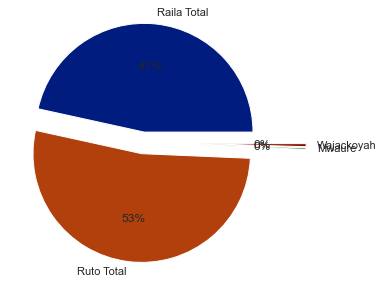

In [54]:


# declaring data
data = [ mwango_raila_total, mwango_ruto_total, mwango_mwaure_total, mwango_wajackoyah_total]
keys = ['Raila Total', 'Ruto Total', 'Mwaure', 'Wajackoyah' ]

# declaring exploding pie
explode = [0.1, 0.1, 0.5, 0.5]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
		explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()


## DENNIS ITUMBI

In [56]:
df_dennis.head(3)

,COUNTY,REG_VOTERS,TURNOUT,WSR_VOTES,RAO_VOTES,WAJAKOYAH,MWAURE
0,MOMBASA,641913,276025,113299,160572,1814,466
1,KWALE,328253,178247,52000,124701,1110,428
2,KILIFI,588602,284619,77222,203632,2510,1035


In [58]:
dennis_raila_total =df_dennis["RAO_VOTES"].sum()
print("Raila Total " +str(dennis_raila_total))
print("#######################################")
dennis_ruto_total =df_dennis["WSR_VOTES"].sum()
print("Ruto Total " +str(dennis_ruto_total))
print("#######################################")
dennis_mwaure_total =df_dennis["MWAURE"].sum()
print("Mwaure Total " +str(dennis_mwaure_total))
print("#######################################")
dennis_wajackoyah_total =df_dennis["WAJAKOYAH"].sum()
print("Wajackoyah Total " +str(dennis_wajackoyah_total))
print("#######################################")
dennis_total = dennis_raila_total + dennis_ruto_total + dennis_mwaure_total + dennis_wajackoyah_total
print("Dennis Total " +str(dennis_total))
print("#######################################")

Raila Total 6923259
#######################################
Ruto Total 7158339
#######################################
Mwaure Total 31927
#######################################
Wajackoyah Total 61717
#######################################
Dennis Total 14175242
#######################################


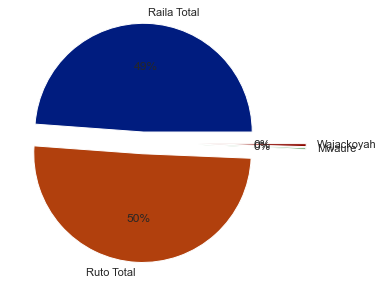

In [59]:
# declaring data
data = [ dennis_raila_total, dennis_ruto_total, dennis_mwaure_total, dennis_wajackoyah_total]
keys = ['Raila Total', 'Ruto Total', 'Mwaure', 'Wajackoyah' ]

# declaring exploding pie
explode = [0.1, 0.1, 0.5, 0.5]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
		explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()

 ## Dr Ahmed Kalebi

In [68]:
df_ahmed.head(1)

,Constituency,Raila,Ruto,Mwaure,Wajackoyah,ValidVotes
0,Webuye West,10876.0,25095.0,179.0,222.0,36372.0


In [66]:
ahmed_raila_total =df_ahmed["Raila"].sum()
print("Raila Total " +str(ahmed_raila_total))
print("#######################################")
ahmed_ruto_total =df_ahmed["Ruto"].sum()
print("Ruto Total " +str(ahmed_ruto_total))
print("#######################################")
ahmed_mwaure_total =df_ahmed["Mwaure"].sum()
print("Mwaure Total " +str(ahmed_mwaure_total))
print("#######################################")
ahmed_wajackoyah_total =df_ahmed["Wajackoyah"].sum()
print("Wajackoyah Total " +str(ahmed_wajackoyah_total))
print("#######################################")
ahmed_total = ahmed_raila_total + ahmed_ruto_total + ahmed_mwaure_total + ahmed_wajackoyah_total
print("Ahmed Total " +str(ahmed_total))
print("#######################################")

Raila Total 6759682.0
#######################################
Ruto Total 7046251.0
#######################################
Mwaure Total 24496.0
#######################################
Wajackoyah Total 46606.0
#######################################
Ahmed Total 13877035.0
#######################################


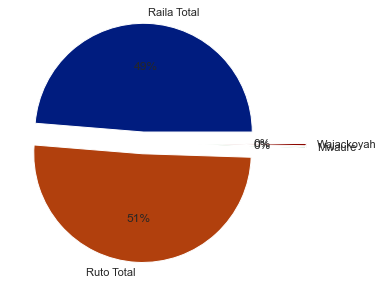

In [65]:
# declaring data
data = [  ahmed_raila_total , ahmed_ruto_total , ahmed_mwaure_total , ahmed_wajackoyah_total]
keys = ['Raila Total', 'Ruto Total', 'Mwaure', 'Wajackoyah' ]

# declaring exploding pie
explode = [0.1, 0.1, 0.5, 0.5]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
		explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()

# COMPARISON